In [1]:
import pandas as pd
import numpy as np
import pickle
import scipy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn import tree, metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import gzip

In [2]:
# read in csv
df = pd.read_csv('training_25_features.csv')
df

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,...,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
1,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
2,-0.005,0.131,0.136,-0.063,-0.070,0.133,-0.125,-0.082,-0.102,-0.190,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
3,-0.005,0.130,0.135,-0.063,-0.070,0.132,-0.122,-0.077,-0.094,-0.172,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
4,-0.005,0.128,0.133,-0.062,-0.069,0.130,-0.119,-0.071,-0.084,-0.157,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319171,0.010,0.170,0.160,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319172,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319173,0.016,0.176,0.160,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319174,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8


In [3]:
# convert all the columns to float64
for i in range(26):
    df[df.columns[i]] = df[df.columns[i]].astype('float64')
    
# get info for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319176 entries, 0 to 4319175
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   I                   float64
 1   II                  float64
 2   III                 float64
 3   aVF                 float64
 4   aVR                 float64
 5   aVL                 float64
 6   V1                  float64
 7   V2                  float64
 8   V3                  float64
 9   V4                  float64
 10  V5                  float64
 11  V6                  float64
 12  ritmi               float64
 13  age                 float64
 14  sex                 float64
 15  height              float64
 16  weight              float64
 17  nurse               float64
 18  site                float64
 19  device              float64
 20  heart_axis          float64
 21  validated_by        float64
 22  second_opinion      float64
 23  validated_by_human  float64
 24  pacemaker           floa

In [4]:
# train-test split
X = df[['I','II','III','aVF','aVR','aVL','V1','V2','V3','V4','V5','V6','age','sex','height','weight']]
X.to_csv('training_17_features.csv')
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)

# Random Forest

In [5]:
# Plug in appropriate max_depth and random_state parameters
rf = RandomForestClassifier()
# rf_param_grid = {'n_estimators': [20], 'criterion': ['entropy'], 'max_depth': [20]} #0.9267653536506913
rf_param_grid = {'n_estimators': [45], 'criterion': ['entropy'], 'max_depth': [45]} #0.9868391563552115
rf_cv= GridSearchCV(rf,rf_param_grid,cv=7,n_jobs=-1)
rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.9640002321293967
Best Parameters: {'criterion': 'entropy', 'max_depth': 45, 'n_estimators': 45}


In [6]:
y_train_pred = rf_cv.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1009610
         1.0       0.99      0.99      0.99    800602
         2.0       1.00      1.00      1.00   1429170

    accuracy                           1.00   3239382
   macro avg       1.00      1.00      1.00   3239382
weighted avg       1.00      1.00      1.00   3239382



In [7]:
y_test_pred = rf_cv.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97    335792
         1.0       0.96      0.96      0.96    267846
         2.0       0.96      0.97      0.97    476156

    accuracy                           0.97   1079794
   macro avg       0.97      0.97      0.97   1079794
weighted avg       0.97      0.97      0.97   1079794



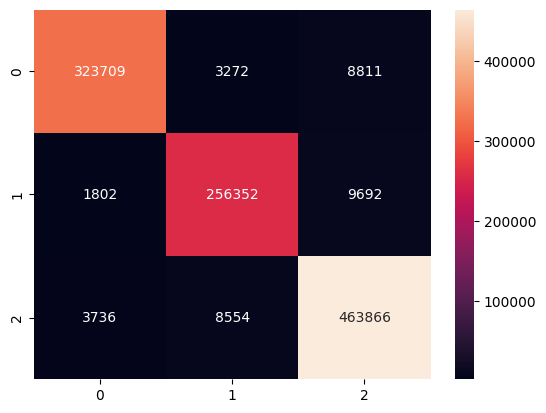

In [8]:

# confusion matrix seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [9]:
# import pickle
# with open('25_feature_random_model.pkl','wb') as file:
#     pickle.dump(rf_cv,file)

## Deep learning models

In [10]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,MaxPooling1D,LSTM
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

In [11]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
y_test_old = y_test.copy()

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape[1]

3

## 1-D Convolution

In [15]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# fit network
history_1d = model.fit(X_train, y_train, epochs=2)
# evaluate model

Epoch 1/2


2022-12-06 20:42:58.913053: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


101231/101231 [==============================] - 73s 717us/step - loss: 1.0019 - accuracy: 0.4647
Epoch 2/2
101231/101231 [==============================] - 80s 795us/step - loss: 0.9843 - accuracy: 0.4783


In [17]:
_, accuracy = model.evaluate(X_test, y_test)

33744/33744 [==============================] - 12s 338us/step - loss: 0.9935 - accuracy: 0.4702


In [18]:
pred_result = model.predict(X_test)
final_pred = [np.argmax(i) for i in pred_result]
print(classification_report(y_test_old,final_pred))

33744/33744 [==============================] - 10s 296us/step
              precision    recall  f1-score   support

         0.0       0.48      0.33      0.39    335792
         1.0       0.67      0.07      0.13    267846
         2.0       0.46      0.79      0.58    476156

    accuracy                           0.47   1079794
   macro avg       0.53      0.40      0.37   1079794
weighted avg       0.52      0.47      0.41   1079794



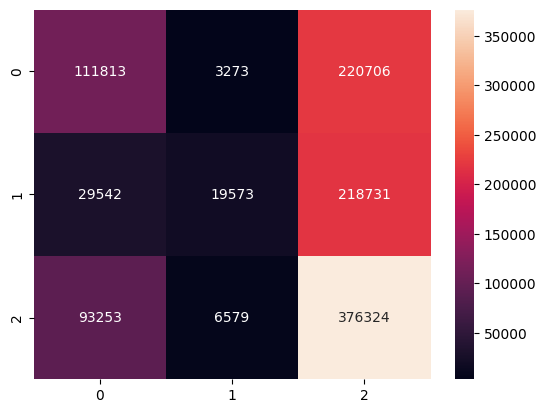

In [19]:

# confusion matrix seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_old,final_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [20]:
# model.save('1_d_model_25_feat')

## LSTM models

In [21]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(100, activation="relu"))
lstm_model.add(Dense(y_train.shape[1], activation="softmax"))
lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 51,203
Trainable params: 51,203
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit network
history_lstm = lstm_model.fit(X_train, y_train, epochs=1)
# evaluate model

101231/101231 [==============================] - 436s 4ms/step - loss: 0.9351 - accuracy: 0.5143


In [23]:
_, accuracy = lstm_model.evaluate(X_test, y_test)

33744/33744 [==============================] - 48s 1ms/step - loss: 0.8641 - accuracy: 0.5692


In [24]:
lstm_pred_result = lstm_model.predict(X_test)

33744/33744 [==============================] - 46s 1ms/step


In [25]:
final_pred_lstm = [np.argmax(i) for i in lstm_pred_result]

In [26]:
print(classification_report(y_test_old,final_pred_lstm))

              precision    recall  f1-score   support

         0.0       0.64      0.35      0.46    335792
         1.0       0.56      0.52      0.54    267846
         2.0       0.55      0.75      0.64    476156

    accuracy                           0.57   1079794
   macro avg       0.58      0.54      0.54   1079794
weighted avg       0.58      0.57      0.56   1079794



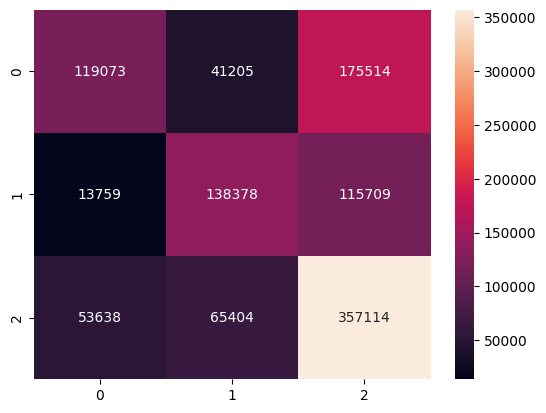

In [27]:

# confusion matrix seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_old,final_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [28]:
# model.save('lstm_model_25_feat')